In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
batch_size = 128
number_classes = 10
epochs = 4

image_rows, image_columns = 28, 28
input_dim = image_rows * image_columns

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

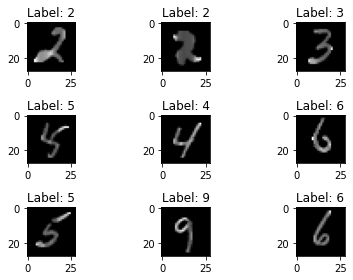

In [4]:
figure, axes = plt.subplots(3,3)
random_number = random.randint(0,x_train.shape[0])
plot_samples = x_train[random_number:random_number+9,:,:]
plot_samples_values = y_train[random_number:random_number+9]

for index in range(9):
    ax = axes[index//3, index%3]
    ax.imshow(plot_samples[index], cmap='gray')
    ax.set_title('Label: {}'.format(plot_samples_values[index]))
    
plt.tight_layout()
plt.show()

In [5]:
model = Sequential()
model.add(keras.layers.Flatten())
model.add(Dense(256, activation = 'relu', input_dim = input_dim))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(number_classes, activation = 'softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
stats = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/4
422/422 [==============================] - 2s 6ms/step - loss: 0.3939 - accuracy: 0.8929 - val_loss: 0.1643 - val_accuracy: 0.9540
Epoch 2/4
422/422 [==============================] - 3s 6ms/step - loss: 0.1602 - accuracy: 0.9524 - val_loss: 0.1192 - val_accuracy: 0.9675
Epoch 3/4
422/422 [==============================] - 3s 7ms/step - loss: 0.1070 - accuracy: 0.9678 - val_loss: 0.0988 - val_accuracy: 0.9707
Epoch 4/4
422/422 [==============================] - 3s 7ms/step - loss: 0.0795 - accuracy: 0.9763 - val_loss: 0.0899 - val_accuracy: 0.9745


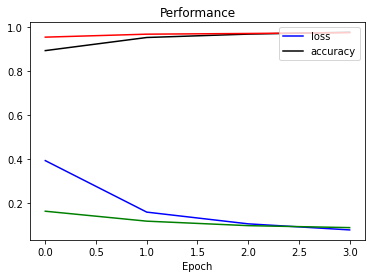

In [8]:
plt.plot(stats.history['loss'], color='blue')
plt.plot(stats.history['accuracy'], color='black')
plt.plot(stats.history['val_loss'], color='green')
plt.plot(stats.history['val_accuracy'], color='red')
plt.title('Performance')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss: {} \nAccuracy : {}'.format(score[0], score[1]))

Loss: 0.10407094657421112 
Accuracy : 0.9696999788284302


In [10]:
predictions = numpy.argmax(model.predict(x_test), axis=1)

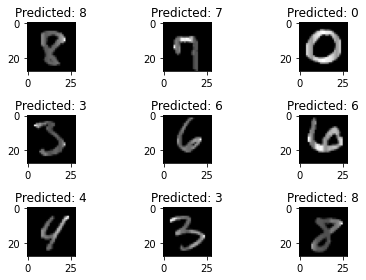

In [11]:
figure, axes = plt.subplots(3,3)
random_number = random.randint(0,x_test.shape[0])
plot_samples = x_test[random_number:random_number+9,:,:]
plot_samples_values = predictions[random_number:random_number+9]

for index in range(9):
    ax = axes[index//3, index%3]
    ax.imshow(plot_samples[index], cmap='gray')
    ax.set_title('Predicted: {}'.format(plot_samples_values[index]))
    
plt.tight_layout()
plt.show()